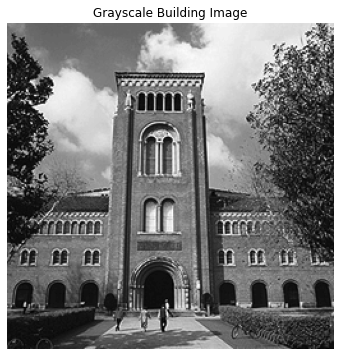

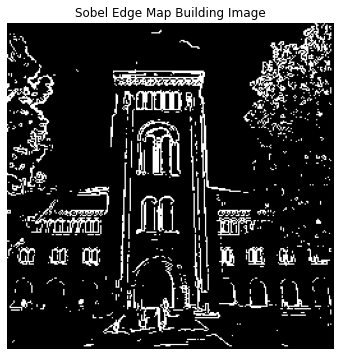

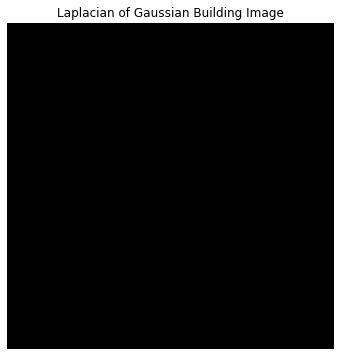

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def readraw_color(filename, width, height, num_channels): 
    dtype = np.uint8
    with open(filename, 'rb') as f:
        out = np.fromfile(f, dtype).reshape((height, width))
    return out


def transform_to_gray(img):
    # As the images are already in grayscale, this function can return the image directly.
    return img


def sobel_edge_detection(img, sobel_mask_x, sobel_mask_y, threshold):
    width, height = img.shape
    new_image_x = np.zeros((height, width))
    new_image_y = np.zeros((height, width))
    new_image = np.zeros((height, width))
    for i in range(1, height-1):
        for j in range(1, width-1):
            gx = np.sum(np.multiply(sobel_mask_x, img[i-1:i+2, j-1:j+2])) 
            gy = np.sum(np.multiply(sobel_mask_y, img[i-1:i+2, j-1:j+2]))
            new_image_x[i-1, j-1] = gx
            new_image_y[i-1, j-1] = gy
            magnitude = np.sqrt(gx**2 + gy**2)
            if magnitude > threshold:
                new_image[i-1, j-1] = 255
            else:
                new_image[i-1, j-1] = 0
    return new_image

def zero_crossing(image):
    z_c_image = np.zeros(image.shape)
    width, height = image.shape
    for i in range(1, width-1):
        for j in range(1, height-1):
            if image[i][j] == 0:
                if (image[i+1][j] > 0 and image[i-1][j] < 0) or (image[i+1][j] < 0 and image[i-1][j] > 0) or (image[i][j+1] > 0 and image[i][j-1] < 0) or (image[i][j+1] < 0 and image[i][j-1] > 0):
                    z_c_image[i][j] = 255
    return z_c_image

def laplacian_of_gaussian(image, std_dev, threshold):
    log_image = np.zeros(image.shape)
    width, height = image.shape
    laplacian_mask = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    for i in range(1, width-1):
        for j in range(1, height-1):
            local_pixels = image[i-1:i+2, j-1:j+2]
            filtered_pixels = local_pixels * laplacian_mask
            if filtered_pixels.sum() > threshold:
                log_image[i, j] = 255
    return zero_crossing(log_image)

# Constants and parameters
filename_building = './Project2_Images/building.raw'
filename_building_noise = './Project2_Images/building_noise.raw'
image_width = 256
image_height = 256
num_channels = 1
threshold_sobel = 100
threshold_log = 0.5
std_dev = 1.0

# Sobel Masks
sobel_mask_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_mask_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Read and process images
building = readraw_color(filename_building, image_width, image_height, num_channels)
building_noise = readraw_color(filename_building_noise, image_width, image_height, num_channels)
building_gray = transform_to_gray(building)
building_noise_gray = transform_to_gray(building_noise)

# Edge detection
edge_map_building = sobel_edge_detection(building_gray, sobel_mask_x, sobel_mask_y, threshold_sobel)
edge_map_building_noise = sobel_edge_detection(building_noise_gray, sobel_mask_x, sobel_mask_y, threshold_sobel)

# Laplacian of Gaussian Edge detection
log_building = laplacian_of_gaussian(building_gray, std_dev, threshold_log)
log_building_noise = laplacian_of_gaussian(building_noise_gray, std_dev, threshold_log)


def plot_image(image, title='Image', cmap='gray'):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off') # Hide axis labels
    plt.show()
plot_image(building_gray, 'Grayscale Building Image')
plot_image(edge_map_building, 'Sobel Edge Map Building Image')
plot_image(log_building, 'Laplacian of Gaussian Building Image')